In [114]:
import numpy as np
import matplotlib.pyplot as plt

from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model

from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [116]:
X, Y = load_planar_dataset()

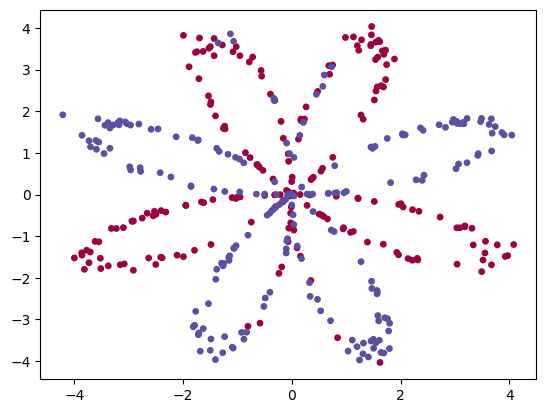

In [118]:
plt.scatter(X[0, :], X[1,:], c=Y, s=15, cmap = plt.cm.Spectral)
plt.show()

In [120]:
shape_x= X.shape
shape_y= Y.shape
m= Y.shape[1]

print("The shape of X is: " + str(shape_x))
print("The shape of Y is: " + str(shape_y))
print("The no. of training examples are: " + str(m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
The no. of training examples are: 400


In [122]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.ravel())

LogisticRegressionCV()

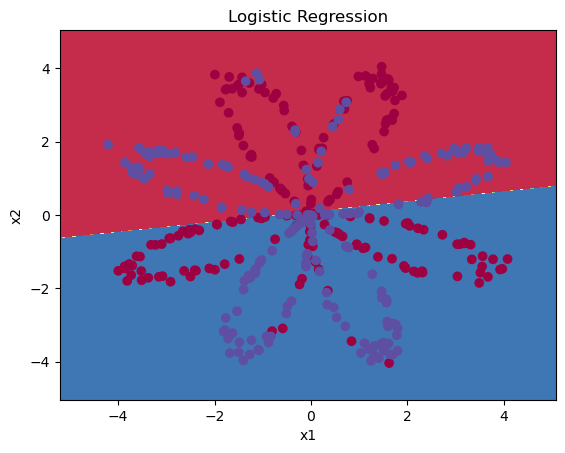

Accuracy of logistic regression: 47% of correctly labeled datapoints


In [123]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")
plt.show()

#Print Accuracy
LR_predictions = clf.predict(X.T)
accuracy = (np.dot(Y, LR_predictions) + np.dot(1 - Y, 1 - LR_predictions)) / float(Y.size) * 100

print('Accuracy of logistic regression: %d%% of correctly labeled datapoints'  %accuracy.item() )
#print('Accuracy of logistic regression:  %d  ' % float((np.dot(Y, LR_predictions) + np.dot(1-Y, 1-LR_predictions)) / float(Y.size)*100) + '%' + "percentage of correctly labeled datapoints")

In [126]:
def layer_sizes(X, Y):
    n_x= X.shape[0]
    n_h= 4
    n_y= Y.shape[0]
    
    return (n_x, n_h, n_y)

In [128]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [130]:
def initialize_parameters(n_x, n_h, n_y):

    W1= np.random.rand(n_h, n_x) * 0.01
    b1= np.zeros(shape = (n_h, 1))
    W2= np.random.rand(n_y, n_h) * 0.01
    b2= np.zeros(shape = (n_y,1 ))

    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))

    parameters = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2        
    }
    return parameters 

In [131]:
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1:  " + str(parameters["W1"]))
print("b1:  " + str(parameters["b1"]))
print("W2:  " + str(parameters["W2"]))
print("b2:  " + str(parameters["b2"]))

W1:  [[0.00686501 0.00834626]
 [0.00018288 0.00750144]
 [0.00988861 0.00748166]
 [0.00280444 0.00789279]]
b1:  [[0.]
 [0.]
 [0.]
 [0.]]
W2:  [[0.00103226 0.00447894 0.00908596 0.00293614]]
b2:  [[0.]]


In [132]:
def forward_propagation(X, parameters):
    
    w1 = parameters['W1']
    b1 = parameters['b1']
    w2 = parameters['W2']
    b2 = parameters['b2']

    Z1= np.dot(w1, X) + b1
    A1= np.tanh(Z1)
    Z2= np.dot(w2, A1) + b2
    A2= np.tanh(Z2)
    #eps= 1e-15
    #A2= A2+ eps
    
    assert (A2.shape == (1, X.shape[1]))
    cache = {
        "Z1" : Z1,
        "A1" : A1,
        "Z2" : Z2,
        "A2" : A2
    }
    return A2, cache

In [133]:
X_assess, parameters= forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']) )

-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.0004381872860197385


In [138]:
def compute_cost(A2, Y, parameters):

    A2= np.clip(A2, 1e-10, (1- 1e-10))
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y),(np.log(1-A2)))
    cost = - np.sum(logprobs)/m

    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    return cost

In [140]:
A2, Y_assess, parameters= compute_cost_test_case()
cost= compute_cost(A2, Y_assess, parameters)

print("Cost = " + str(cost))

Cost = 0.005196899203320949


In [142]:
def backward_propagation(parameters, cache, X, Y):

    M = X.shape[1]
    W1= parameters['W1']
    W2= parameters['W2']
    
    A1= cache['A1']
    A2= cache['A2']
    dZ2 = A2- Y
    dW2 = ( 1/m ) * np.dot(dZ2, A1.T)
    db2 = ( 1/m) * np.sum(dZ2, axis = 1, keepdims= True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2) , ( 1- np.power(A1, 2)))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis= 1, keepdims= True)
    
    grads = {
        "dW1" : dW1,
        "db1" : db1,
        "dW2" : dW2,
        "db2" : db2
    }
    return grads

In [144]:
parameters, cache, X_assess, y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, X_assess, Y_assess)

print("dW1  :" + str(grads["dW1"]))
print("db1  :" + str(grads["db1"]))
print("dW2  :" + str(grads["dW2"]))
print("db2  :" + str(grads["db2"]))

dW1  :[[ 8.06446862e-05  5.25828547e-06]
 [ 6.91594866e-05  4.57092777e-06]
 [-4.20203436e-05 -2.72033434e-06]
 [-1.74656045e-04 -1.13425665e-05]]
db1  :[[-2.68703113e-05]
 [-2.31214020e-05]
 [ 1.39999712e-05]
 [ 5.81948007e-05]]
dW2  :[[ 3.20484546e-05  1.54551939e-04  1.40867139e-04 -3.21487179e-05]]
db2  :[[0.00253978]]


In [215]:
def update_parameters(parameters, grads, learning_rate = 1):

    W1= parameters['W1']
    b1= parameters['b1']
    W2= parameters['W2']
    b2= parameters['b2']

    dW1= grads['dW1']
    db1= grads['db1']
    dW2= grads['dW2']
    db2= grads['db2']

    W1= W1- dW1*learning_rate
    b1= b1- db1*learning_rate
    W2= W2- dW2*learning_rate
    b2= b2- db2*learning_rate

    parameters = {
        "W1" : W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
        
    return parameters

In [217]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 is:  " + str(parameters['W1']))
print("b1 is:  " + str(parameters['b1']))
print("W2 is:  " + str(parameters['W2']))
print("b2 is:  " + str(parameters['b2']))

W1 is:  [[-0.00638361  0.01895633]
 [-0.02394014  0.03837897]
 [-0.01660339 -0.02038905]
 [ 0.01028293 -0.05828154]]
b1 is:  [[-1.00309354e-06]
 [ 1.19737658e-05]
 [ 7.94965778e-07]
 [-3.09207480e-06]]
W2 is:  [[-0.01041433 -0.04389238  0.01732894  0.0469597 ]]
b2 is:  [[0.00010239]]


In [219]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost= False):
    np.random.seed(3)
    n_x= layer_sizes(X, Y)[0]
    n_y= layer_sizes(X, Y)[2]

    parameters= initialize_parameters(n_x, n_h, n_y)
    W1= parameters['W1']
    b1= parameters['b1']
    W2= parameters['W2']
    b2= parameters['b2']

    for i in range(0, num_iterations):
        A2, cache= forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)

        if print_cost and i % 1000 == 0:
            print("Cost after every %i : %f " % (i, cost))

    return parameters

In [220]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, n_h , num_iterations= 10000, print_cost= False)
print("W1 is:  " + str(parameters['W1']))
print("b1 is:  " + str(parameters['b1']))
print("W2 is:  " + str(parameters['W2']))
print("b2 is:  " + str(parameters['b2']))

W1 is:  [[-1.48860226  0.66210046]
 [ 2.44408385  0.65523295]
 [ 1.90555807 -0.11554194]
 [ 2.48394456  0.60784443]]
b1 is:  [[-1.16654803]
 [ 0.64826912]
 [ 1.08988088]
 [ 0.55616476]]
W2 is:  [[-16.19878987  17.6803527   16.54199188  17.85056577]]
b2 is:  [[17.44859099]]


In [221]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions= np.round(A2)
    return predictions

In [223]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("Predictions mean are:  " + str(np.mean(predictions)))

Predictions mean are:  0.0


Cost after every 0 : 9.050027 
Cost after every 1000 : 0.335143 
Cost after every 2000 : 0.325792 
Cost after every 3000 : 0.320876 
Cost after every 4000 : 0.316238 
Cost after every 5000 : 0.305770 
Cost after every 6000 : 0.296992 
Cost after every 7000 : 0.292348 
Cost after every 8000 : 0.288863 
Cost after every 9000 : 0.286066 


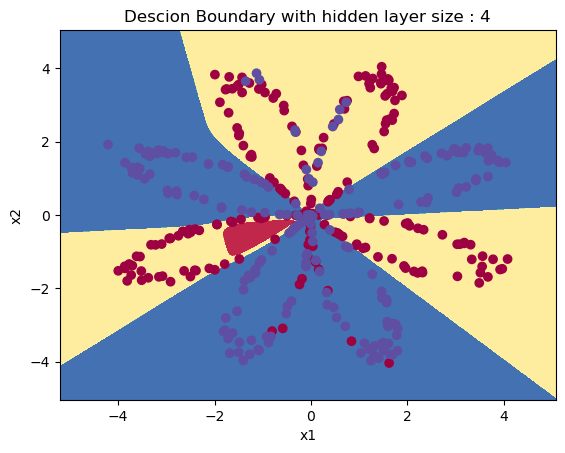

In [224]:
# Now building & tesing model on own dataset

parameters = nn_model(X,Y, n_h= 4, num_iterations=10000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters , x.T) , X, Y)
plt.title("Descion Boundary with hidden layer size : " +str(n_h))
plt.show()

In [225]:
predictions = predict(parameters, X)
accuracy = (np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T)) / float(Y.size) *100
print('Accuracy : %d%%' % accuracy.item())

Accuracy : 89%


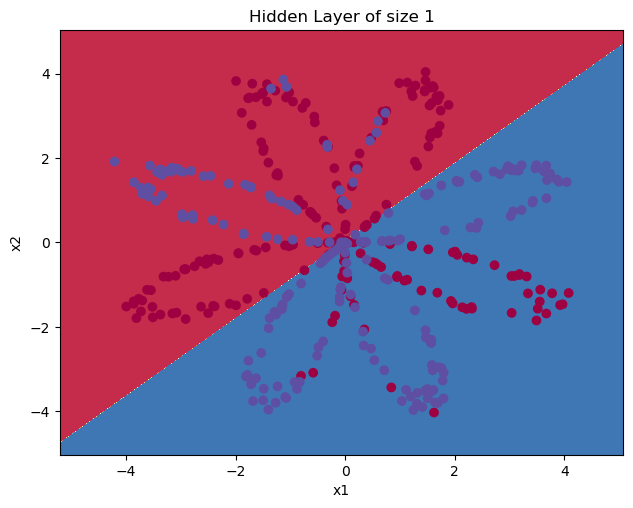

C:\Users\DEll\AppData\Local\Temp\ipykernel_14388\358576770.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float(np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T) / float(Y.size) * 100 )


Accuracy for 1 hidden units: 170.25 %


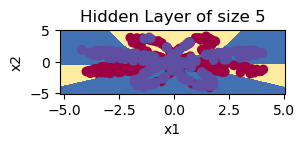

Accuracy for 5 hidden units: 219.5 %


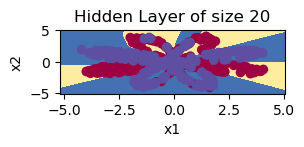

Accuracy for 20 hidden units: 223.5 %


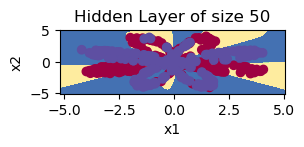

Accuracy for 50 hidden units: 222.75 %


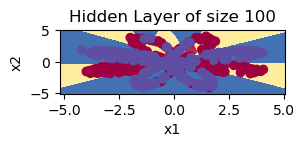

Accuracy for 100 hidden units: 226.25 %


In [232]:
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1, 5, 20, 50, 100]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(3,2, i +1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters= nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    plt.show() 
    predictions = predict(parameters, X)
    accuracy = float(np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T) / float(Y.size) * 100 )
    print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

C:\Users\DEll\AppData\Local\Temp\ipykernel_14388\79783250.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 66.0 %
Accuracy for 3 hidden units: 88.25 %
Accuracy for 4 hidden units: 88.25 %
Accuracy for 5 hidden units: 88.25 %
Accuracy for 20 hidden units: 89.25 %
Accuracy for 50 hidden units: 88.5 %


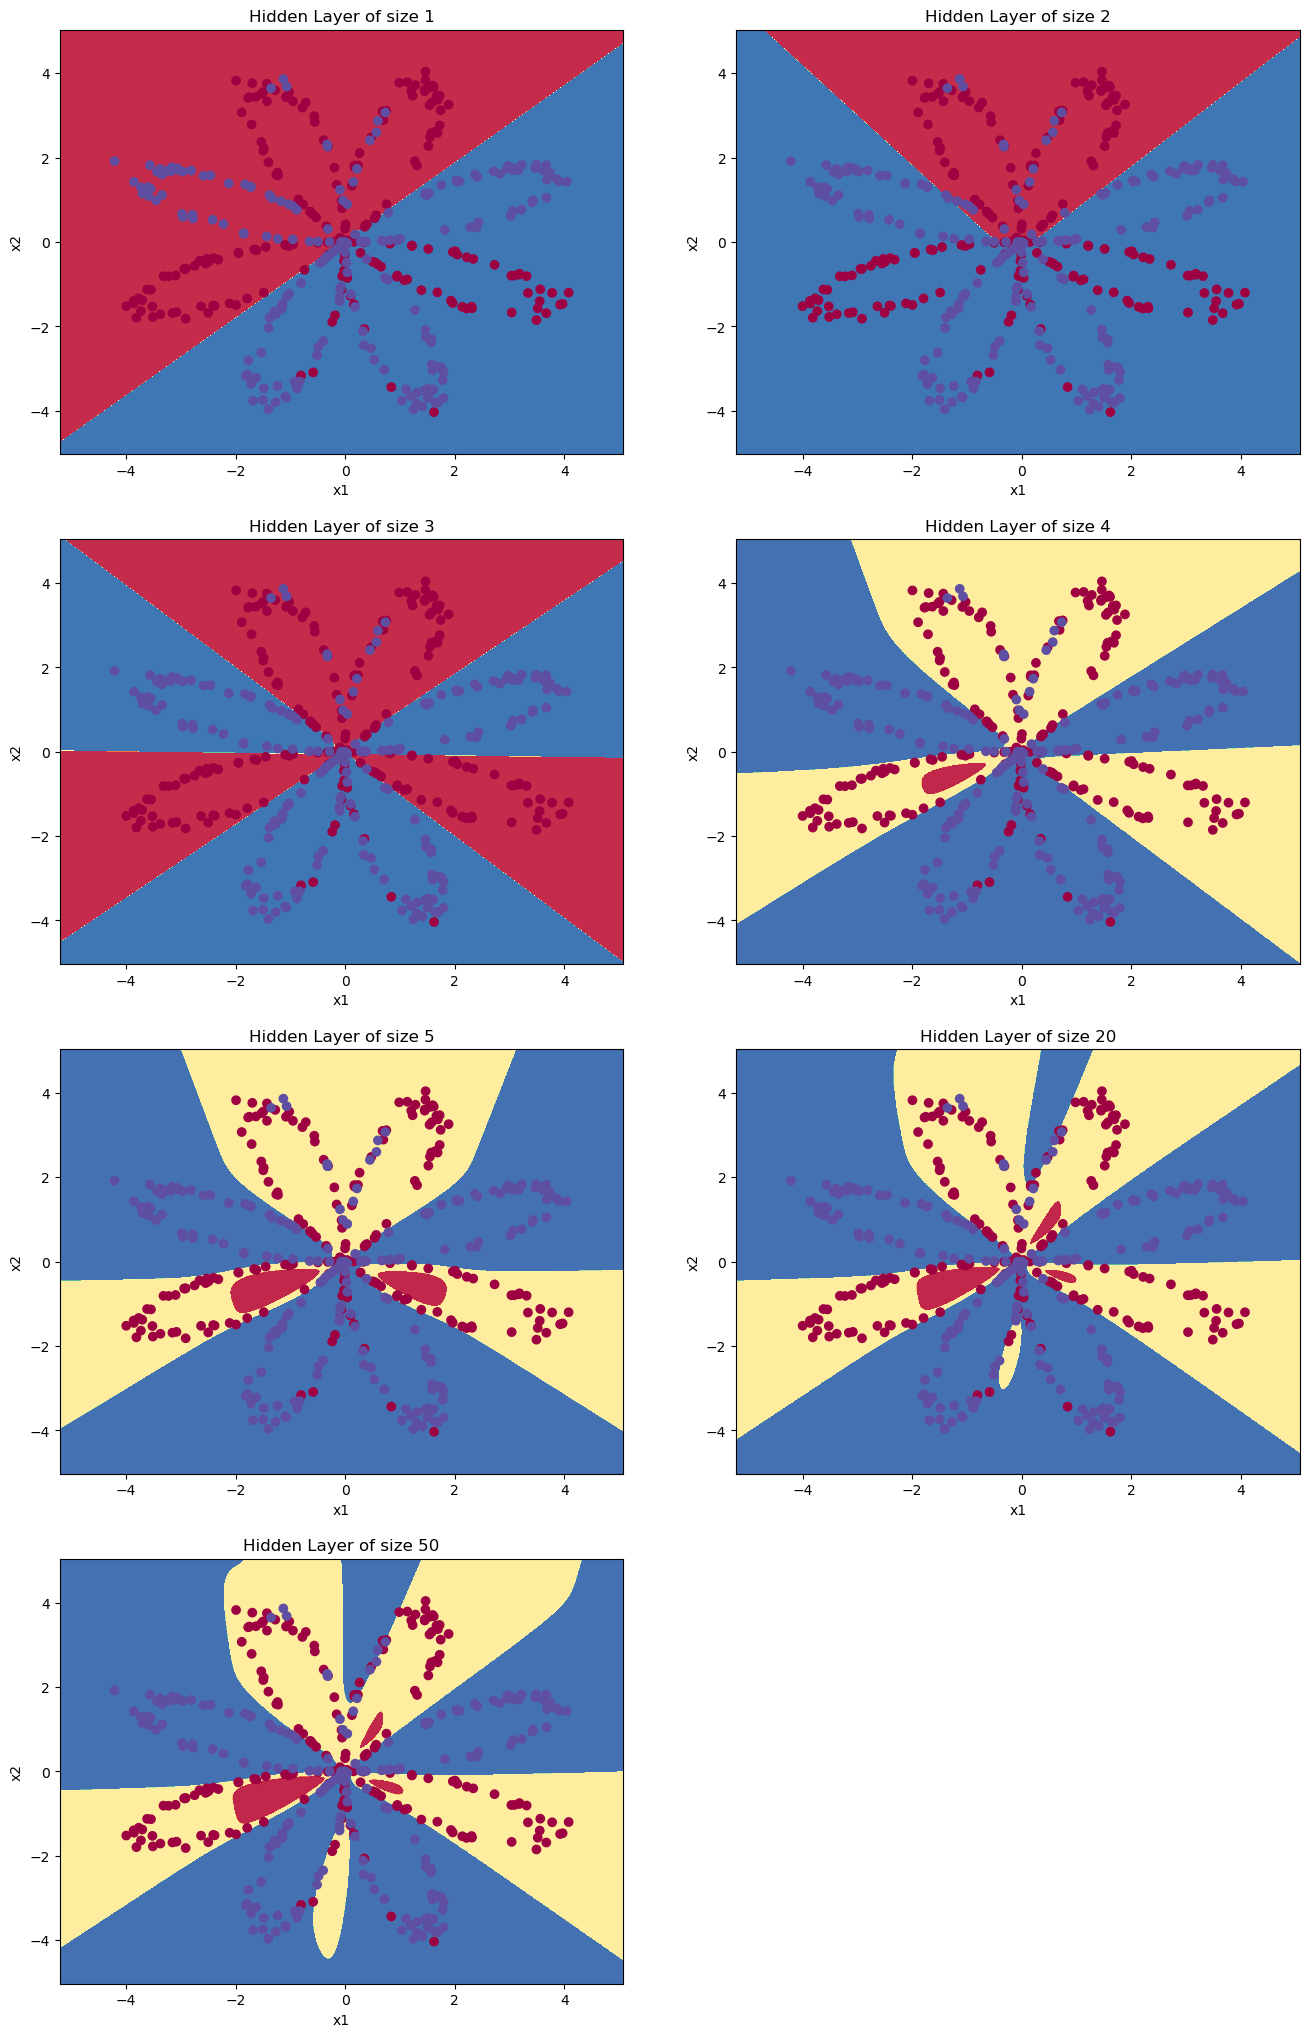

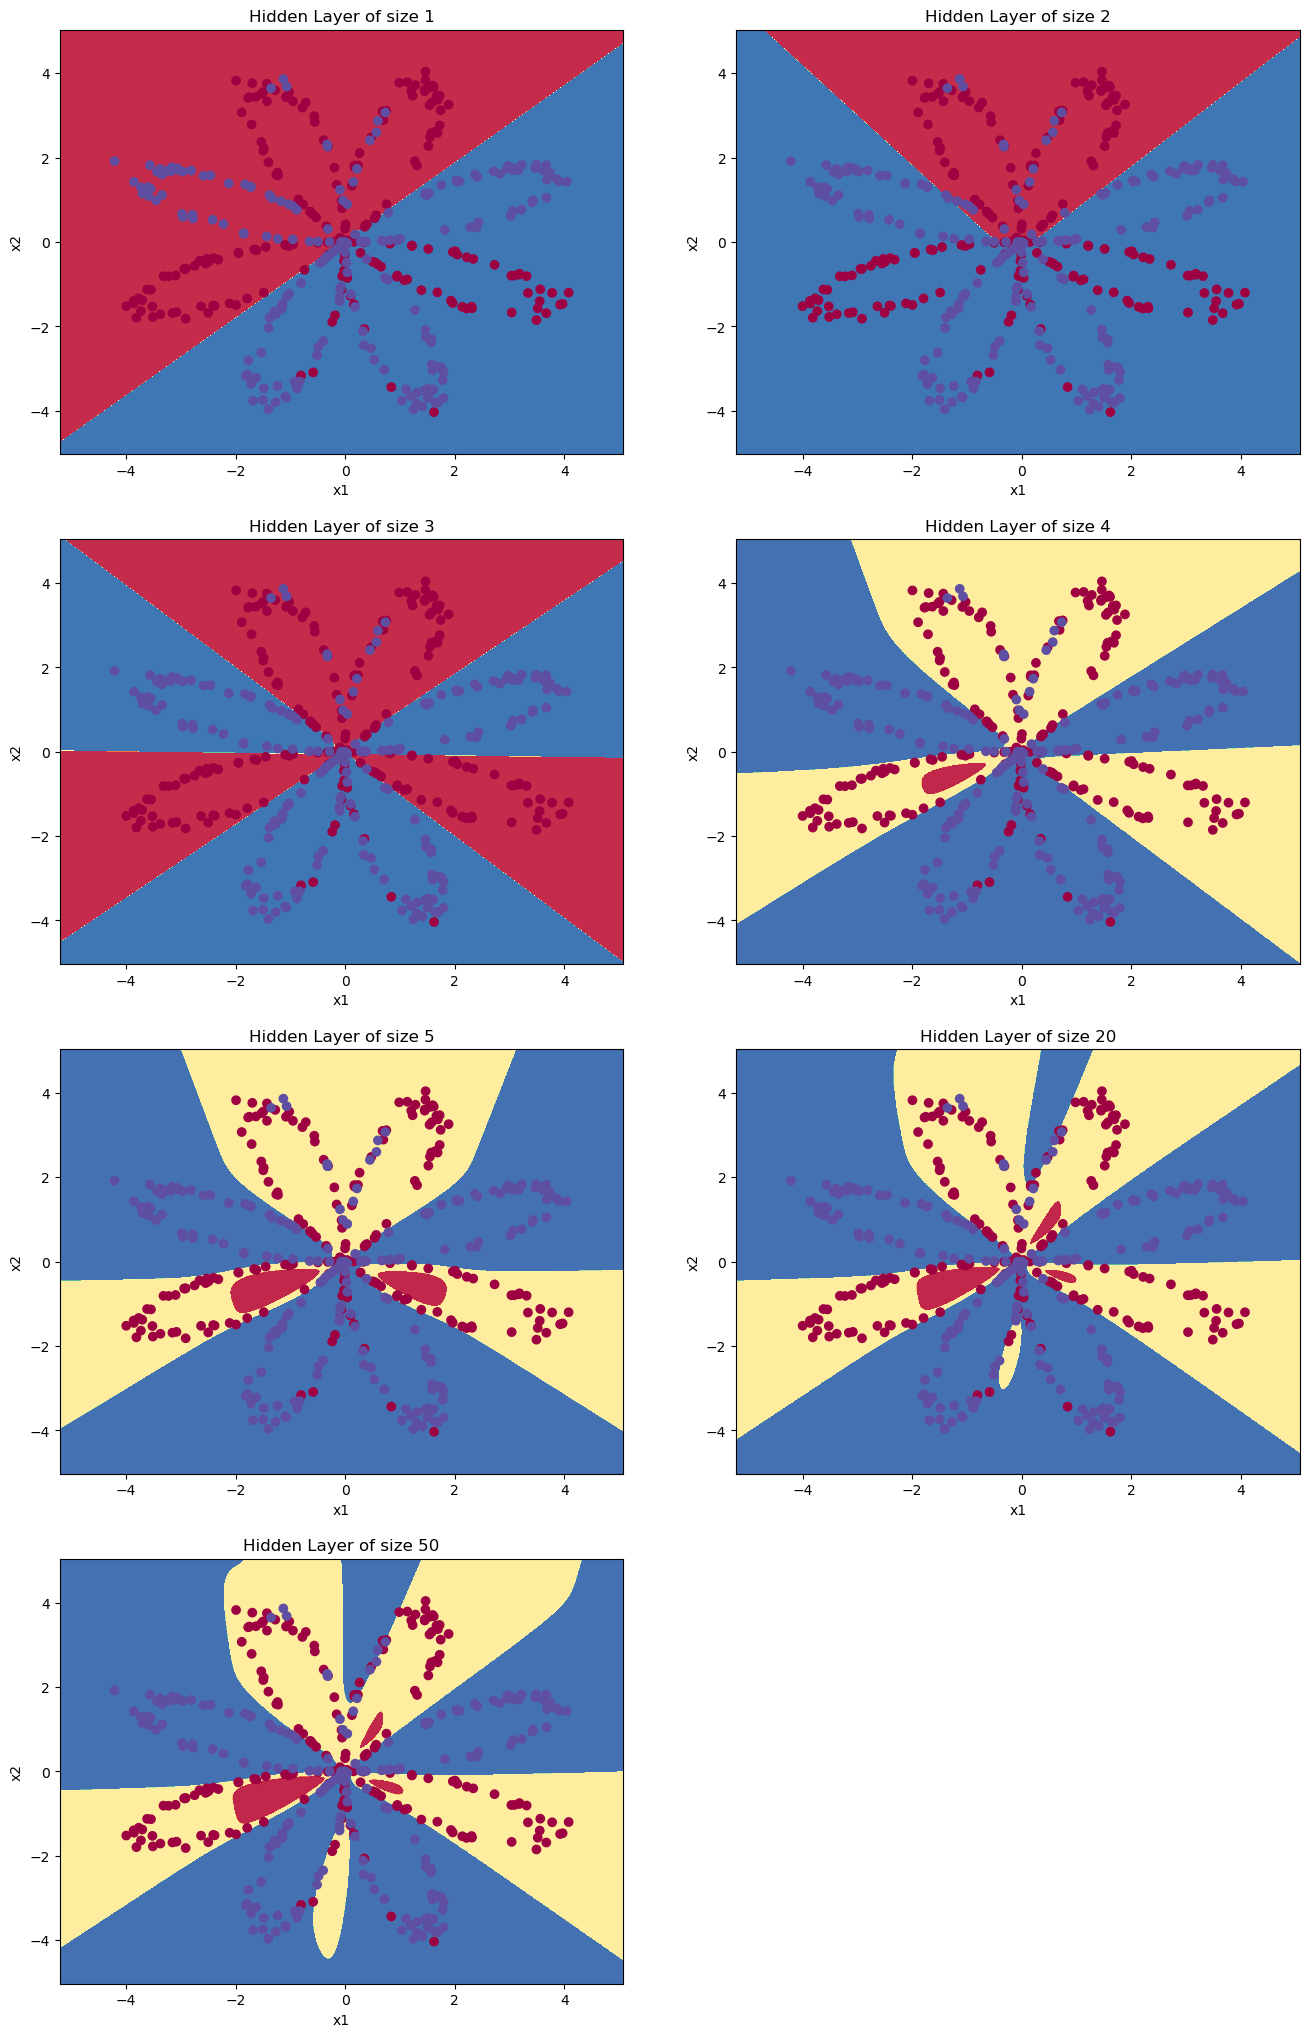

In [236]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
plt.show()